# Machine Learning in Python

based on [this step by step guide](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)

For today, we will skip most of the theoretical background that goes into machine learning go straight into learning by doing - applying a basic workflow to a dataset to answer some basic questions. If you want to (and you should, if you want to continue using machine learning in the future) learn more about the theoretical backgrounds I reccommend reading [Bishop - Pattern Recognition and Machine Learning](https://github.com/peteflorence/MachineLearning6.867/blob/master/Bishop/Bishop%20-%20Pattern%20Recognition%20and%20Machine%20Learning.pdf). Broadly speaking, there are two types of supervised learning models - models for classification and models for regression. What type of model you will use will depend on your specific use case. Today we will focus on **classification** and apply a basic pipeline to a pre existing dataset

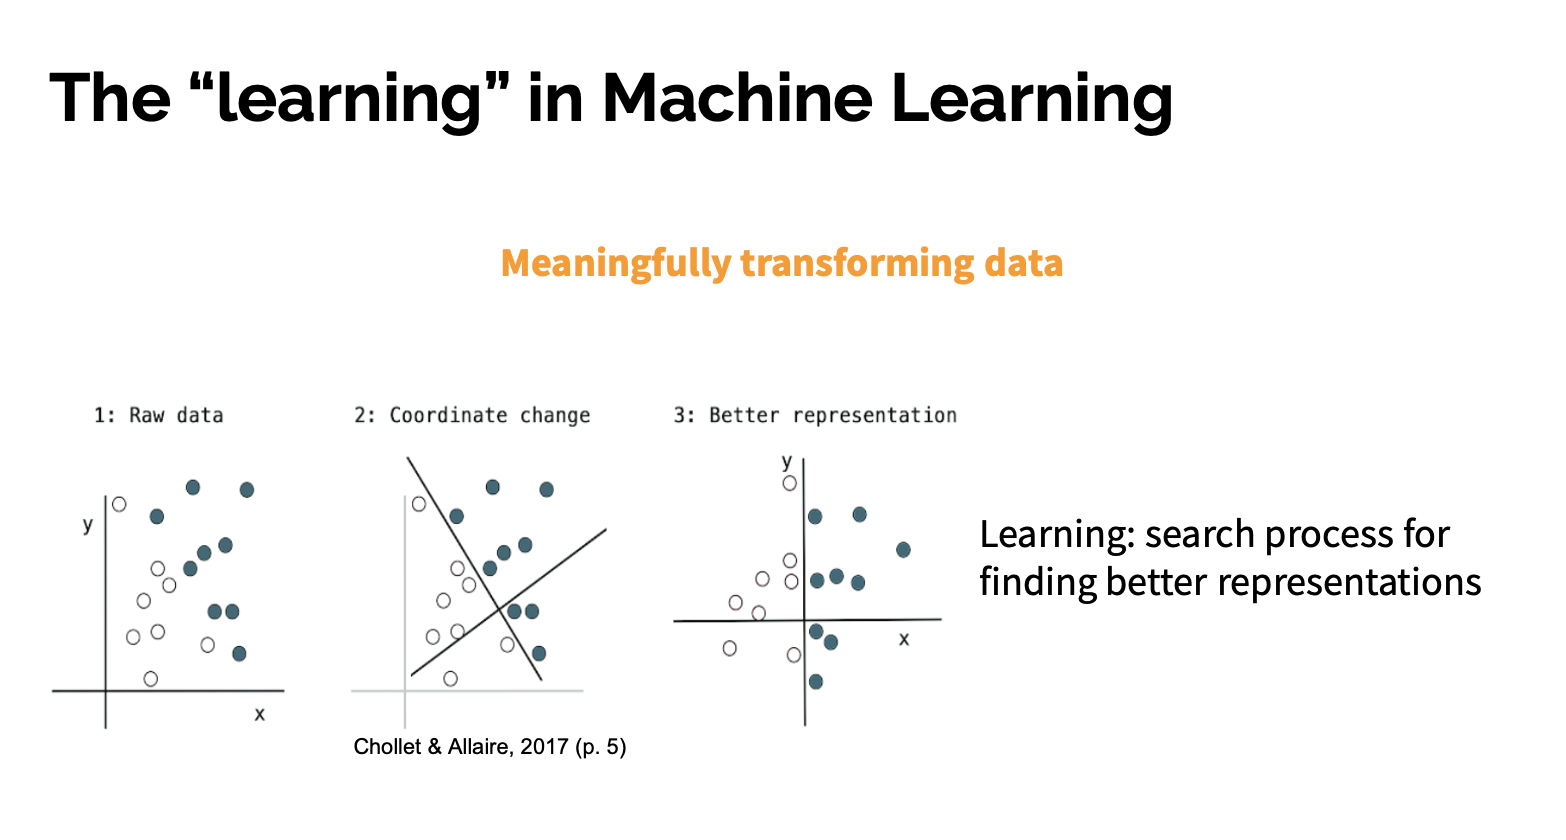

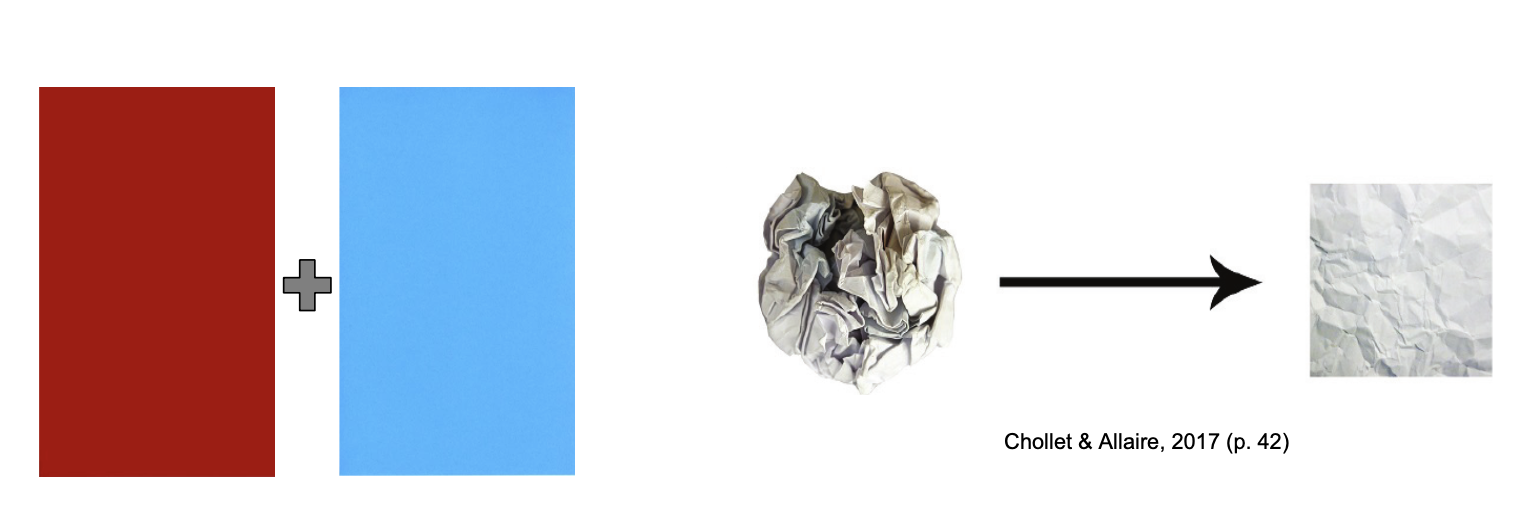

Lets begin by looking at the basic steps of most machine learning projects:

- Define Problem.
- Prepare Data.
- Evaluate Algorithms.
- Improve Results.
- Present Results.

In [1]:
!pip install -U scikit-learn

  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 6.6 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [2]:
import scipy
import numpy as np
import matplotlib as plt
import pandas as pd
import sklearn

We will first load all functions that we will use

In [3]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Now, lets load the dataset

In [5]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [6]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Univariate plots

Remeber, we can also use some basic plotting functions on pandas dataframes! This will give us an even better idea of the data distributions

sepal-length       Axes(0.125,0.53;0.352273x0.35)
sepal-width     Axes(0.547727,0.53;0.352273x0.35)
petal-length       Axes(0.125,0.11;0.352273x0.35)
petal-width     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

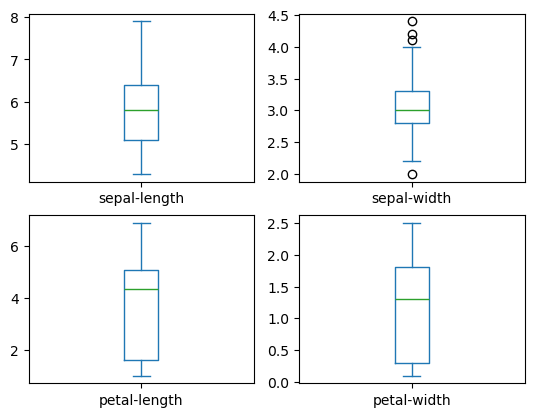

In [11]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>]], dtype=object)

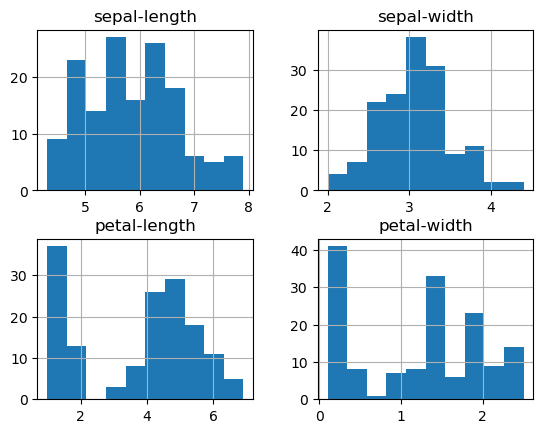

In [12]:
# histograms
dataset.hist()


### Multivariate plots

Now we can consider the relationships between different variables

array([[<Axes: xlabel='sepal-length', ylabel='sepal-length'>,
        <Axes: xlabel='sepal-width', ylabel='sepal-length'>,
        <Axes: xlabel='petal-length', ylabel='sepal-length'>,
        <Axes: xlabel='petal-width', ylabel='sepal-length'>],
       [<Axes: xlabel='sepal-length', ylabel='sepal-width'>,
        <Axes: xlabel='sepal-width', ylabel='sepal-width'>,
        <Axes: xlabel='petal-length', ylabel='sepal-width'>,
        <Axes: xlabel='petal-width', ylabel='sepal-width'>],
       [<Axes: xlabel='sepal-length', ylabel='petal-length'>,
        <Axes: xlabel='sepal-width', ylabel='petal-length'>,
        <Axes: xlabel='petal-length', ylabel='petal-length'>,
        <Axes: xlabel='petal-width', ylabel='petal-length'>],
       [<Axes: xlabel='sepal-length', ylabel='petal-width'>,
        <Axes: xlabel='sepal-width', ylabel='petal-width'>,
        <Axes: xlabel='petal-length', ylabel='petal-width'>,
        <Axes: xlabel='petal-width', ylabel='petal-width'>]], dtype=object)

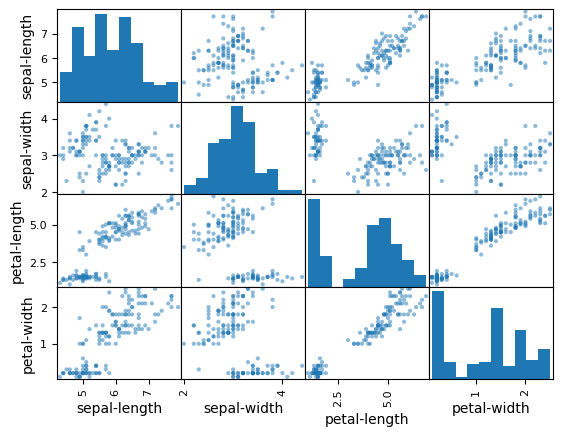

In [14]:
# scatter plot matrix
scatter_matrix(dataset)

### Evaluate some algorithms

Training and validation should always be seperated i.e. should not be performed on the same data. We will therefore split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

In [18]:
# Split into train and validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

We will use stratified 10-fold cross validation to estimate model accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

Let’s test 3 different algorithms:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- Support Vector Machines (SVM)

In [20]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))

models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('SVM', SVC(gamma='auto'))]

In [21]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
SVM: 0.983333 (0.033333)


Text(0.5, 1.0, 'Algorithm Comparison')

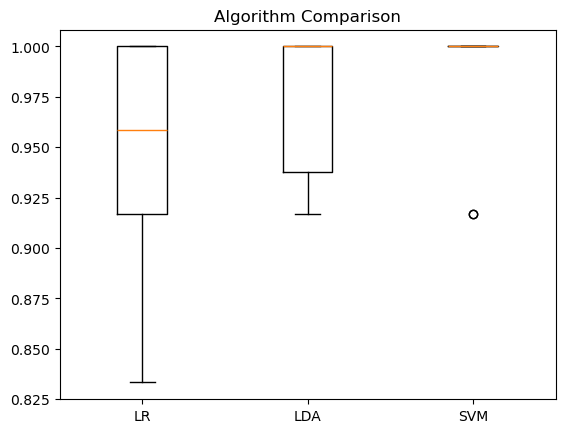

In [22]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')


### Make predictions

We will pick the best performing algorithm - SVM - and test it on the held out validation set. This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.

In [27]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

### Evaluate predictions

In [29]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))


0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


### Whats next?

Want to continue practicing? Keep working on these free, openly available datasets to learn more about the different algorithms, familiarize yourself with data transformations (scaling etc.) and when they are needed. 

Interested in reading minds? Want to learn how to decode brains? Start [here](https://mne.tools/stable/auto_tutorials/machine-learning/50_decoding.html#sphx-glr-auto-tutorials-machine-learning-50-decoding-py)